In [10]:
#Importing Required Library

import pandas as pd                         #data analysis and manipulation
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

In [11]:
#Loading Data Into Data Frame

df = pd.read_csv("data.csv") 
df.head(5)                                 # Display the top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [12]:
#Check the Type of Data

df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [13]:
#Dropping Irrelavant Collumns
"""
Kelompok kami sepakat untuk menghilangkan kolom Engine Fuel Type, Engine Cylinders, Driven Wheels, Number of Doors,
Market Category, Vehicle Style, Popularity.

MPG : Miles Per Gallon
Highway MPG: Highway MPG is the average MPG for your car on the highway
City MPG : City MPG is the average MPG for your car in the city
"""


df = df.drop(['Engine Fuel Type', 'Engine Cylinders', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Style', 'Popularity'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Transmission Type,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,MANUAL,Compact,28,18,34500


In [14]:
#Renaming the Collumns

df = df.rename(columns={"Engine HP": "HP", "Transmission Type": "Transmission", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Transmission,Vehicle Size,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,MANUAL,Compact,28,18,34500


In [15]:
#Dropping the Duplicate Row

df.shape                    #Know the number of rows and collums

(11914, 9)

In [16]:
duplicate_rows_df = df[df.duplicated()]                         #Get the number of duplicated row
print("number of duplicate rows: ", duplicate_rows_df.shape)    #Output

number of duplicate rows:  (994, 9)


In [17]:
df.count()      #Count the number of rows (dupicate or not)

Make            11914
Model           11914
Year            11914
HP              11845
Transmission    11914
Vehicle Size    11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [18]:
df = df.drop_duplicates()      #Drop duplicate row

In [19]:
df.count()     #Count the number of rows after dropping the duplicate row

Make            10920
Model           10920
Year            10920
HP              10851
Transmission    10920
Vehicle Size    10920
MPG-H           10920
MPG-C           10920
Price           10920
dtype: int64

In [20]:
#Dropping the missing and null values

print(df.isnull().sum())         #count the number of missing and null values

Make             0
Model            0
Year             0
HP              69
Transmission     0
Vehicle Size     0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [21]:
df = df.dropna()    #Dropping the missing values.
df.count()          #Count the number of rows after dropping the missing and null values

Make            10851
Model           10851
Year            10851
HP              10851
Transmission    10851
Vehicle Size    10851
MPG-H           10851
MPG-C           10851
Price           10851
dtype: int64

In [22]:
print(df.isnull().sum())   #Check if there are some missing or null values left

Make            0
Model           0
Year            0
HP              0
Transmission    0
Vehicle Size    0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


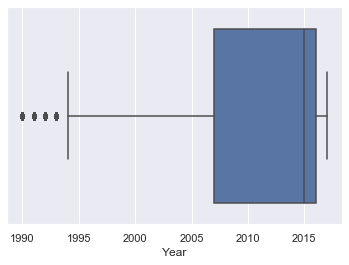

In [23]:
#Detecting Outliers

sns.boxplot(x=df['Year'])

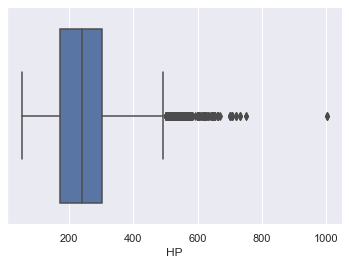

In [24]:
sns.boxplot(x=df['HP'])

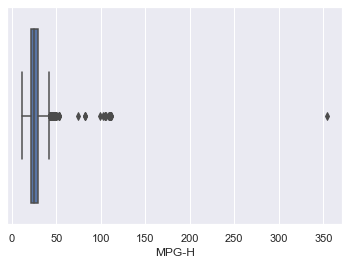

In [25]:
sns.boxplot(x=df['MPG-H'])

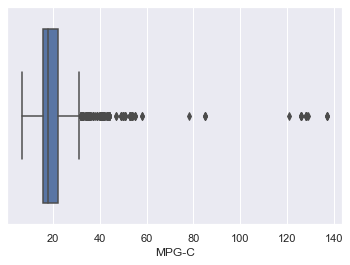

In [26]:
sns.boxplot(x=df['MPG-C'])

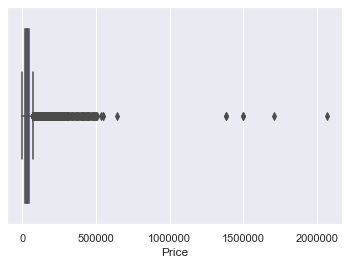

In [27]:
sns.boxplot(x=df['Price'])

In [29]:
Q1 = df.quantile(0.25)   #Find 1st Quartile
Q3 = df.quantile(0.75)   #Find 3rd Quartile 
IQR = Q3 - Q1            #Find Interquartile Range
print(IQR)

Year         9.0
HP         130.0
MPG-H        8.0
MPG-C        6.0
Price    21302.5
dtype: float64


In [30]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]  #Removing Outliers
df.shape

(9209, 9)

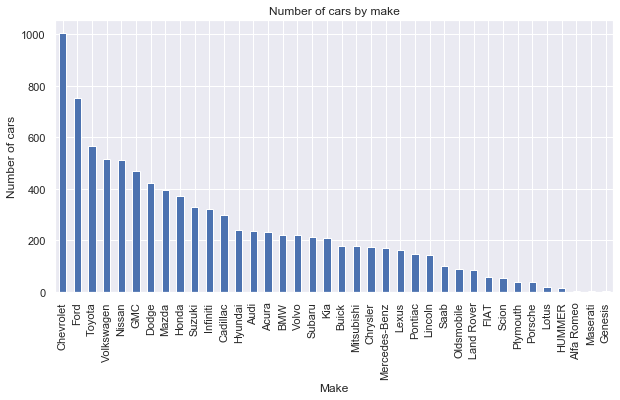

In [31]:
#Histogram
#To know the number of cars being made from each company

df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

,Year,HP,MPG-H,MPG-C,Price
Year,1.000000,0.323523,0.381452,0.342992,0.594027
HP,0.323523,1.000000,-0.443332,-0.543082,0.736608
MPG-H,0.381452,-0.443332,1.000000,0.939452,-0.102858
MPG-C,0.342992,-0.543082,0.939452,1.000000,-0.175380
Price,0.594027,0.736608,-0.102858,-0.175380,1.000000


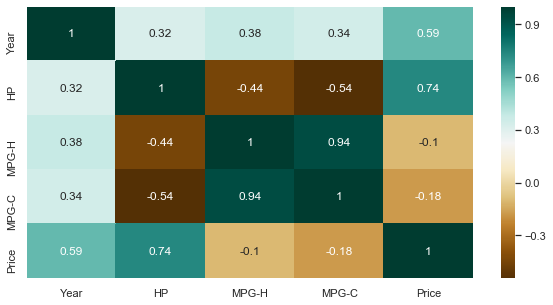

In [32]:
#Heat Maps
#To find the dependent variables

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

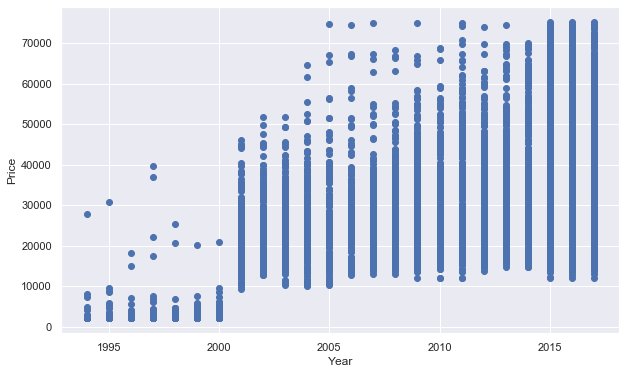

In [33]:
#Scatterplot
#Kelompok kami menentukan untuk menggunakan korelasi antara Year dan Price

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

In [3]:
df.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Year")
plt.ylabel('Number of cars')
plt.xlabel('Year');

NameError: name 'df' is not defined

In [2]:
df.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Year")
plt.ylabel('Number of cars')
plt.xlabel('Year');

NameError: name 'df' is not defined